In [2]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import yfinance as yf
# Download data
start = '2010-01-01'
end = '2023-12-31'
df = yf.download('AAPL', start=start, end=end)


C:\Users\ajitk\AppData\Roaming\Python\Python312\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [7]:
# Handle missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values


C:\Users\ajitk\AppData\Local\Temp\ipykernel_16336\3669520347.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [8]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800


In [83]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


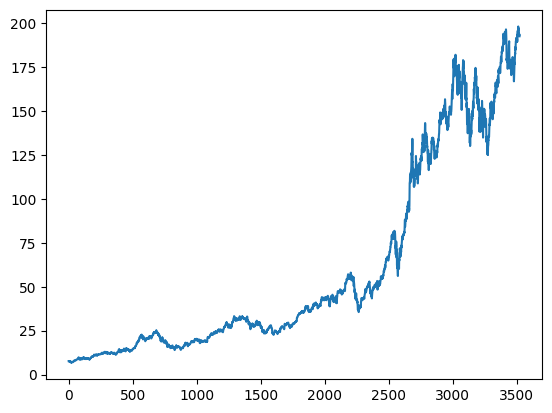

In [9]:
plt.plot(df.Close)

In [10]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3522,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3.522000e+03
mean,2016-12-30 22:57:51.209540096,59.883701,60.528731,59.267621,59.926226,57.846540,2.422834e+08
min,2010-01-04 00:00:00,6.870357,7.000000,6.794643,6.858929,5.806767,2.404830e+07
25%,2013-07-03 12:00:00,19.680447,19.832321,19.402321,19.608571,17.028918,9.266760e+07
50%,2016-12-29 12:00:00,32.303749,32.633751,32.078751,32.340000,29.176616,1.526602e+08
75%,2020-06-30 18:00:00,91.213125,92.512501,90.425623,91.207499,89.195448,3.284715e+08
max,2023-12-29 00:00:00,198.020004,199.619995,197.000000,198.110001,197.857529,1.880998e+09
std,NaN,55.387520,56.014467,54.812449,55.444533,55.782268,2.204578e+08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3522 non-null   datetime64[ns]
 1   Open       3522 non-null   float64       
 2   High       3522 non-null   float64       
 3   Low        3522 non-null   float64       
 4   Close      3522 non-null   float64       
 5   Adj Close  3522 non-null   float64       
 6   Volume     3522 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 192.7 KB


In [12]:
df['Price_Direction'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [13]:
# Features and target variable
X = df[['Open', 'High', 'Low']]  # Features
y = df['Price_Direction']  # Target variable

In [14]:
# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [18]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [19]:
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.5243166489172879
Test Accuracy: 0.5418439716312057


In [99]:
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_test))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.67      0.01      0.02       325
           1       0.54      0.99      0.70       380

    accuracy                           0.54       705
   macro avg       0.60      0.50      0.36       705
weighted avg       0.60      0.54      0.39       705



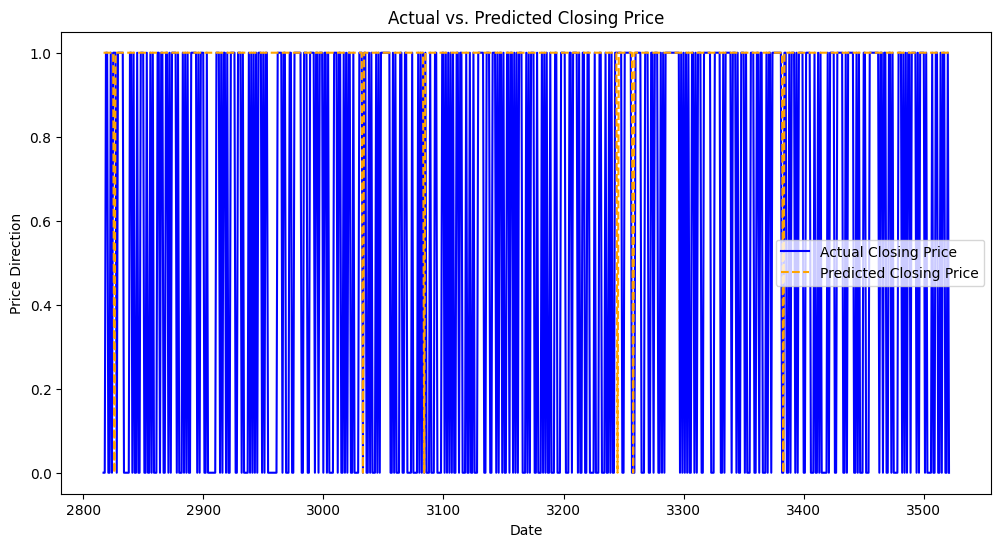

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_pred_test):], y_test, label='Actual Closing Price', color='blue')
plt.plot(df.index[-len(y_pred_test):], y_pred_test, label='Predicted Closing Price', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Price Direction')
plt.title('Actual vs. Predicted Closing Price')
plt.legend()
plt.show()

In [21]:
# Save the model to disk
import joblib

In [22]:
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']